In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain

In [56]:
image = cv2.imread("lenna.png",0)

In [57]:
def floyd_steinberg(original,thresh=127,zig_zag=False):
    img = original
    cycle = 1
    c = 1
    if zig_zag:
        cycle = -1
    
    for y in range(img.shape[0]-1):
        for x in chain(range(0, img.shape[1]-1, 1), range(img.shape[1]-2, -1, cycle)):
            if(img[y][x] > thresh):
                dithering = 255
                err = img[y][x] - 255
            else:
                dithering = 0
                err = img[y][x] - 0
                
            img[y][x] = dithering
            
            img[y][x+c] = img[y][x+c] + err*(7/16)
            img[y+c][x-c] = img[y+c][x-c] + err*(3/16)
            img[y+c][x] = img[y+c][x] + err*(5/16)
            img[y+c][x+c] = img[y+c][x+c] + err*(1/16)
        c *= cycle    
            
            
    return img

In [58]:
a0 = floyd_steinberg(image,zig_zag=False)
cv2.imwrite("floyd.png",a0)
image = cv2.imread("lenna.png",0)
a1 = floyd_steinberg(image,zig_zag=True)
cv2.imwrite("floyd_flip.png",a1)
image = cv2.imread("lenna.png",0)

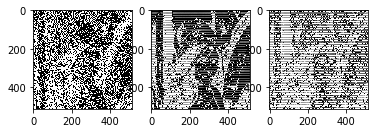

In [59]:
#cv2.imwrite("floyd.png",a0)
#cv2.imwrite("floyd_flip.png",a1)
# display images
fig, ax = plt.subplots(1,3)
ax[0].imshow(a0,cmap="binary")
ax[1].imshow(a1,cmap="binary")
ax[2].imshow(a1-a0,cmap="binary")
plt.show()

In [60]:
d = {0:[[0,0,0],
        [0,0,0],
        [0,0,0]],
     
     1:[[0,255,0],
        [0,0,0],
        [0,0,0]],
     
     2:[[0,255,0],
        [0,0,0],
        [0,0,255]],
     
     3:[[255,255,0],
        [0,0,0],
        [0,0,255]],
     
     4:[[255,255,0],
        [0,0,0],
        [255,0,255]],
     
     5:[[255,255,255],
        [0,0,0],
        [255,0,255]],
     
     6:[[255,255,255],
        [0,0,255],
        [255,0,255]],
     
     7:[[255,255,255],
        [0,0,255],
        [255,255,255]],
     
     8:[[255,255,255],
        [255,0,255],
        [255,255,255]],
     
     9:[[255,255,255],
        [255,255,255],
        [255,255,255]],
     }

In [61]:
def halftoning(img):
    new_img = np.zeros([img.shape[0]*3,img.shape[1]*3])
    m = 1
    n = 1
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            cols = np.array([[m-1, m, m+1],
                             [m-1, m, m+1],
                             [m-1, m, m+1]],
                            dtype=np.intp)
            rows = np.array([[n-1, n-1, n-1],
                             [n, n, n],
                             [n+1, n+1, n+1]],
                             dtype=np.intp)
            
            new_img[cols,rows] = d[round(np.interp(img[i][j],[0,255],[0,9]))]
            n = (n+3)%(new_img.shape[1])
        m = (m+3)%(new_img.shape[0])
    return new_img

In [62]:
a = halftoning(image)

In [63]:
cv2.imwrite("dithering.png",a)

True